# Bayesian Models Examples

In [1]:
from scipy.stats import beta

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm

## Fliping Coins

We build a simple Bayesian model to estimate the fairness of a coin based on observed flips.

**Prior**:  (`p = pm.Beta('fairness', alpha=1, beta=1`)):
- Before seeing any data, we assume the coin's probability of heads could be anything between 0 and 1 with equal likelihood. The `Beta(1,1)` distribution is uniform, representing complete uncertainty about the coin's fairness.

**Likelihood** (`obs = pm.Binomial('obs', n=10, p=p, observed=7)`):
- We condition the model on actual data: 7 heads out of 10 flips. The Binomial distribution models the number of successes (heads) in a fixed number of trials, with probability p.

**Inference** (`trace = pm.sample()`):
- PyMC uses MCMC sampling to combine the prior belief with the observed data, producing a **posterior distribution**. 
- This posterior tells us what values of `p` (coin fairness) are most plausible given the evidence. For 7 heads in 10 flips, the posterior will center around 0.7 but with uncertainty reflecting the limited sample size.

Plotting Function

In [2]:
with pm.Model() as model:
    # Prior: coin fairness before observing data
    p = pm.Beta('fairness', alpha=1, beta=1)
    
    # Likelihood: observe 7 heads out of 10 flips
    obs = pm.Binomial('obs', n=10, p=p, observed=7)
    
    # Inference: sample from posterior
    trace_10 = pm.sample()

summary_10 = az.summary(trace_10, var_names=['fairness'])
display(summary_10)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [fairness]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
fairness,0.667,0.132,0.424,0.906,0.003,0.002,1683.0,1952.0,1.0


array([[<Axes: title={'center': 'fairness'}>,
        <Axes: title={'center': 'fairness'}>]], dtype=object)

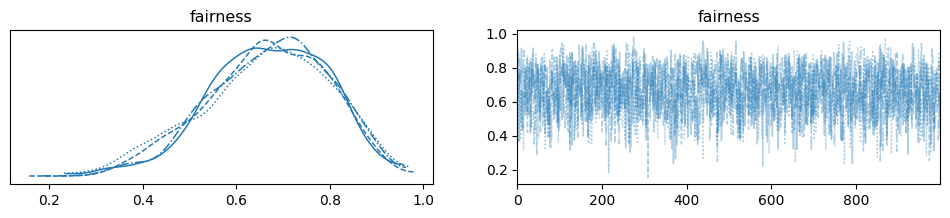

In [3]:
az.plot_trace(trace_10, var_names=['fairness'])

Same but with 100 observations and 70 heads

In [4]:
with pm.Model() as model:
    # Prior: coin fairness before observing data
    p = pm.Beta('fairness', alpha=1, beta=1)
    
    # Likelihood: observe 7 heads out of 10 flips
    obs = pm.Binomial('obs', n=100, p=p, observed=70)
    
    # Inference: sample from posterior
    trace_100 = pm.sample()

summary_100 = az.summary(trace_100, var_names=['fairness'])
display(summary_100)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [fairness]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
fairness,0.698,0.045,0.611,0.781,0.001,0.001,1855.0,2809.0,1.0


Same with 1,000 flips and 700 heads

In [5]:
with pm.Model() as model:
    # Prior: coin fairness before observing data
    p = pm.Beta('fairness', alpha=1, beta=1)
    
    # Likelihood: observe 700 heads out of 1000 flips
    obs = pm.Binomial('obs', n=1000, p=p, observed=700)
    
    # Inference: sample from posterior
    trace_1_000 = pm.sample()

summary_1_000 = az.summary(trace_1_000, var_names=['fairness'])
display(summary_1_000)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [fairness]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
fairness,0.699,0.015,0.672,0.727,0.0,0.0,1555.0,2840.0,1.0


Last one with 10,000 flips and 7,000 heads

In [6]:
with pm.Model() as model:
    # Prior: coin fairness before observing data
    p = pm.Beta('fairness', alpha=1, beta=1)
    
    # Likelihood: observe 7000 heads out of 10,000 flips
    obs = pm.Binomial('obs', n=10_000, p=p, observed=7000)
    
    # Inference: sample from posterior
    trace_10_000 = pm.sample()

summary_10_000 = az.summary(trace_10_000, var_names=['fairness'])
display(summary_10_000)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [fairness]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
fairness,0.7,0.005,0.692,0.709,0.0,0.0,1609.0,2846.0,1.0


Plot all distributions to compare them

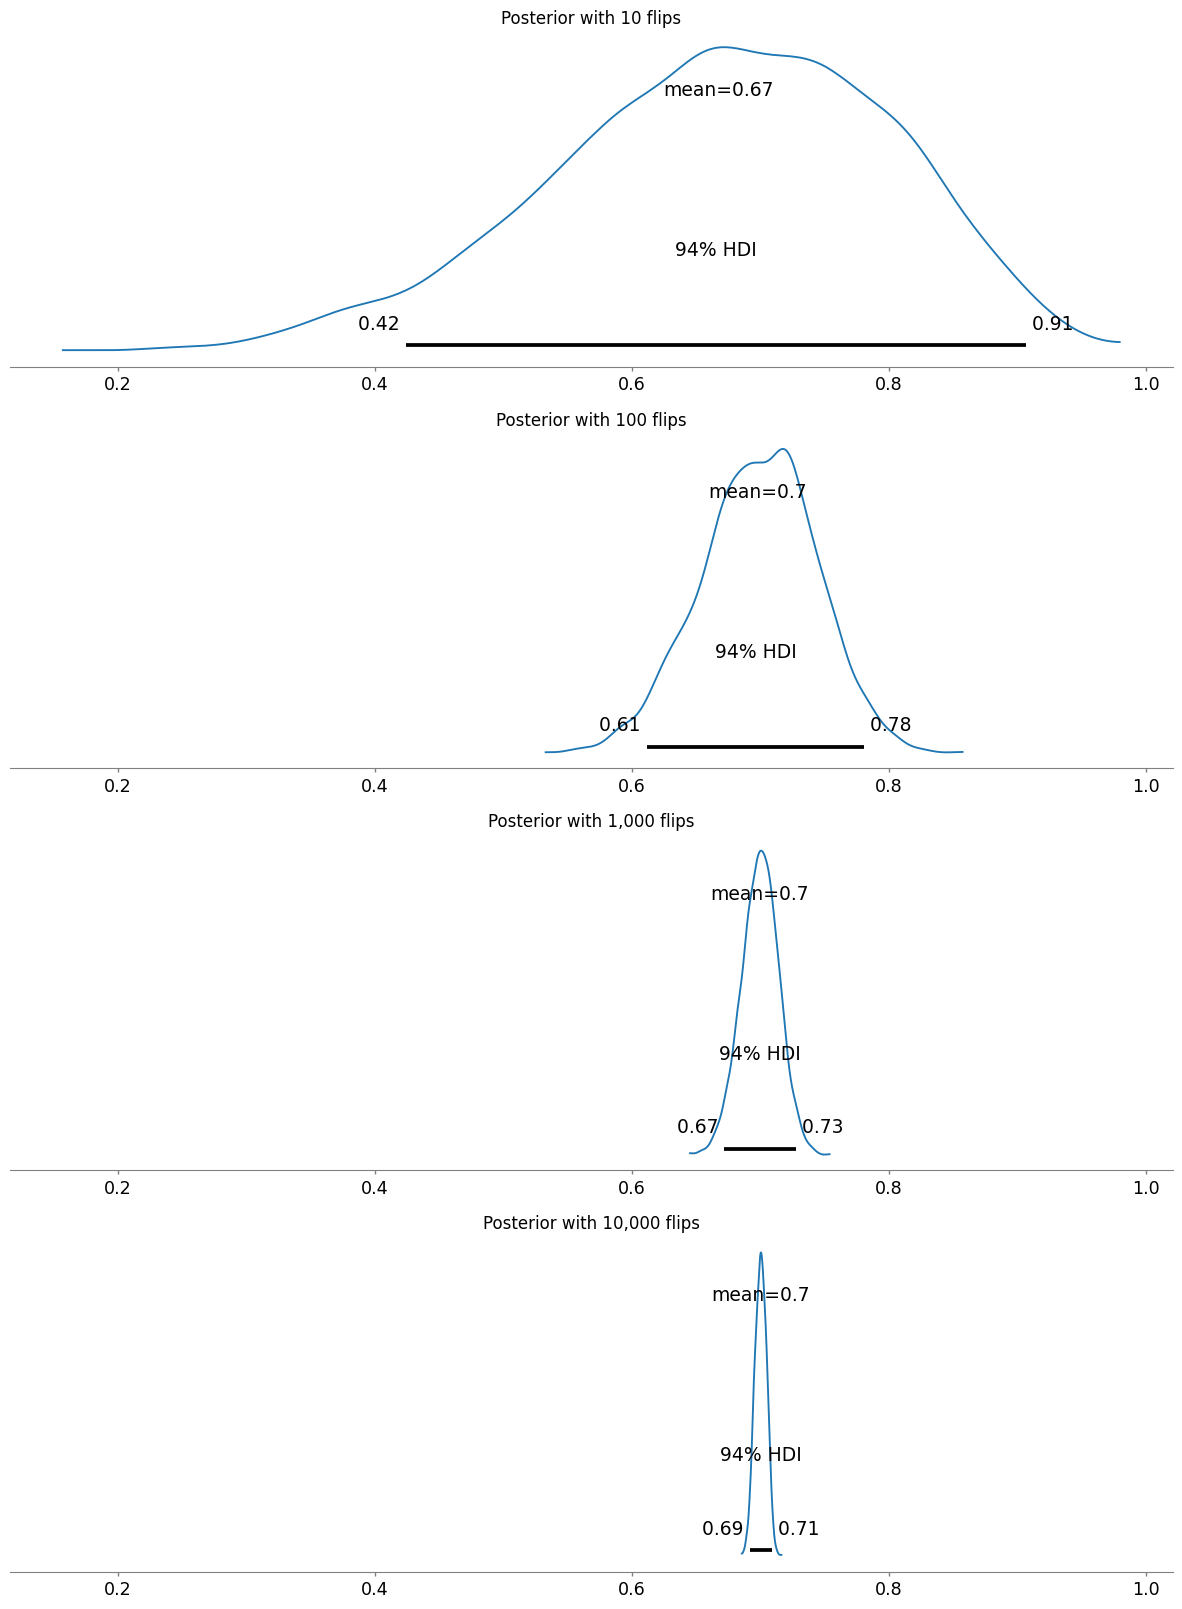

In [7]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(15,20), sharex=True)
az.plot_posterior(trace_10, var_names=['fairness'], ax=ax1, figsize=(5,5));
ax1.set_title('Posterior with 10 flips')
az.plot_posterior(trace_100, var_names=['fairness'], ax=ax2, figsize=(5,5));
ax2.set_title('Posterior with 100 flips')
az.plot_posterior(trace_1_000, var_names=['fairness'], ax=ax3, figsize=(5,5));
ax3.set_title('Posterior with 1,000 flips')
az.plot_posterior(trace_10_000, var_names=['fairness'], ax=ax4, figsize=(5,5));
ax4.set_title('Posterior with 10,000 flips');

#### backup

In [ ]:
# az.plot_trace?

In [ ]:
# az.plot_trace(trace_10, var_names=['fairness']);
# az.plot_trace(trace_100, var_names=['fairness']);
# az.plot_trace(trace_1_000, var_names=['fairness']);
# az.plot_trace(trace_10_000, var_names=['fairness']);

In [6]:
def prior_posterior(trace):
    """Visualize the prior distribution"""
    
    x = np.linspace(0, 1, 1000)
    prior = beta(1, 1).pdf(x)
    plt.figure(figsize=(10, 4))
    plt.plot(x, prior, label='Prior: (Beta)', linewidth=2)
    densities, bin_edges, patches = plt.hist(trace.posterior['fairness'].values.flatten(), bins=60, density=True, alpha=0.6, label='Posterior')
    plt.xlabel('Coin Fairness (p)')
    plt.ylabel('Density')
    plt.title('fairness')
    plt.ylim(0, densities.max())
    plt.legend()
    # plt.grid(alpha=0.3)
    plt.show()

# Personalised Medical Treatment Recommendation

A patient is diagnosed with a condition treatable by three therapies: A, B, or C. 

You have limited data on this specific patient

But there are rich historical evidence from similar patients. 

The goal: recommend the treatment most likely to succeed for them.


## 1 Generate synthetic data

In [8]:
rng = np.random.default_rng(42)

# True (unknown) success probabilities for 3 treatments
treatments = np.array(["Treatment_A", "Treatment_B", "Treatment_C"])
theta_true = np.array([0.65, 0.60, 0.55])

# Small-sample current cohort
n_obs = np.array([12, 15, 10])                # patients per treatment
y_obs = rng.binomial(n_obs, theta_true)       # successes per treatment

print("Observed successes / total per treatment:")
for t, y, n in zip(treatments, y_obs, n_obs):
    print(f"- {t}: {y}/{n}  ({y/n:.1%})")


Observed successes / total per treatment:
- Treatment_A: 7/12  (58.3%)
- Treatment_B: 9/15  (60.0%)
- Treatment_C: 4/10  (40.0%)


## 2 Build and sample a hierarchical model (PyMC)

We are building a **hierarchical Bayesian model** for comparing treatment success rates with partial pooling.

#### The Problem:
You have 3 treatments with only 15 patients each. With such small samples, individual estimates would be unreliable. Hierarchical modeling "borrows strength" across treatments.

#### Model Structure:

1. Hyperpriors (population level):
    - mu: Average log-odds of success across all treatments
    - tau: How much treatments vary from each other

2. Treatment-specific parameters:
    - alpha_offset: Standard normal random effects for each treatment
    - alpha = mu + tau * alpha_offset: Treatment-specific log-odds (non-centered parameterization prevents numerical issues)
    - theta = sigmoid(alpha): Converts log-odds to probabilities [0,1]

3. Likelihood:
    - y ~ Binomial(n_obs, theta): Models observed successes given sample size and success probability


The result:
Estimates for each treatment are partially pooled—extreme values are shrunk toward the group mean, giving more stable estimates than treating each treatment independently.

The hierarchy

```
    mu, tau (hyperpriors) 
        ↓ govern
    alpha (treatment-specific log-odds)
        ↓ transform to
    theta (treatment-specific probabilities)
        ↓ generate
    y (observed successes)
```

> Note:
>
> - Odds: Ratio of success to failure = p/(1-p)
> - Log-odds: log(odds) = log(p/(1-p))

### Regular hierarchical structure:

- Level 1 (Data): Individual patient outcomes for each treatment
- Level 2 (Treatment parameters): Each treatment has its own success rate (theta)
- Level 3 (Hyperpriors): Parameters that govern how the treatment success rates are distributed across all treatments

In [10]:
coords = {"treatment": treatments}

with pm.Model(coords=coords) as model:
    # Hyperpriors on logit success mean and SD (population level)
    mu = pm.Normal("mu", mu=0.0, sigma=1.5)               # Average log-odds of success across all treatments (log-odds)
    tau = pm.HalfNormal("tau", sigma=1.0)                 # How much treatments vary from each other (log-odds)

    # Treatment-specific parameters:
    alpha_offset = pm.Normal("alpha_offset", mu=0.0, sigma=1.0, dims="treatment")   # Standard normal random effects for each treatment
    alpha = pm.Deterministic("alpha", mu + tau * alpha_offset, dims="treatment")    # Treatment-specific log-odds (non-centered parameterization prevents numerical issues)
    theta = pm.Deterministic("theta", pm.math.sigmoid(alpha), dims="treatment")     # Converts log-odds to probabilities [0,1]

    # Likelihood (Binomial successes per treatment)
    y = pm.Binomial("y", n=n_obs, p=theta, observed=y_obs, dims="treatment")        # Models observed successes given sample size and success probability

    # MCMC sampling
    idata = pm.sample(
        draws=2000, tune=1000, chains=4, target_accept=0.95, max_treedepth=15, random_seed=42
    )

    # # Posterior predictive draws for future cohorts (optional: predict 15 new patients)
    # n_new = np.array([15, 15, 15])
    # y_new = pm.Binomial("y_new", n=n_new, p=theta, dims="treatment")
    # idata = pm.sample_posterior_predictive(
    #     idata, var_names=["y_new"], extend_inferencedata=True, random_seed=42
    # )


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, tau, alpha_offset]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


In [11]:
summary = az.summary(idata, var_names=["theta"], hdi_prob=0.95)
summary

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta[Treatment_A],0.552,0.104,0.356,0.767,0.001,0.001,8271.0,6741.0,1.0
theta[Treatment_B],0.559,0.098,0.359,0.746,0.001,0.001,8195.0,6175.0,1.0
theta[Treatment_C],0.492,0.115,0.254,0.703,0.002,0.001,5611.0,6019.0,1.0


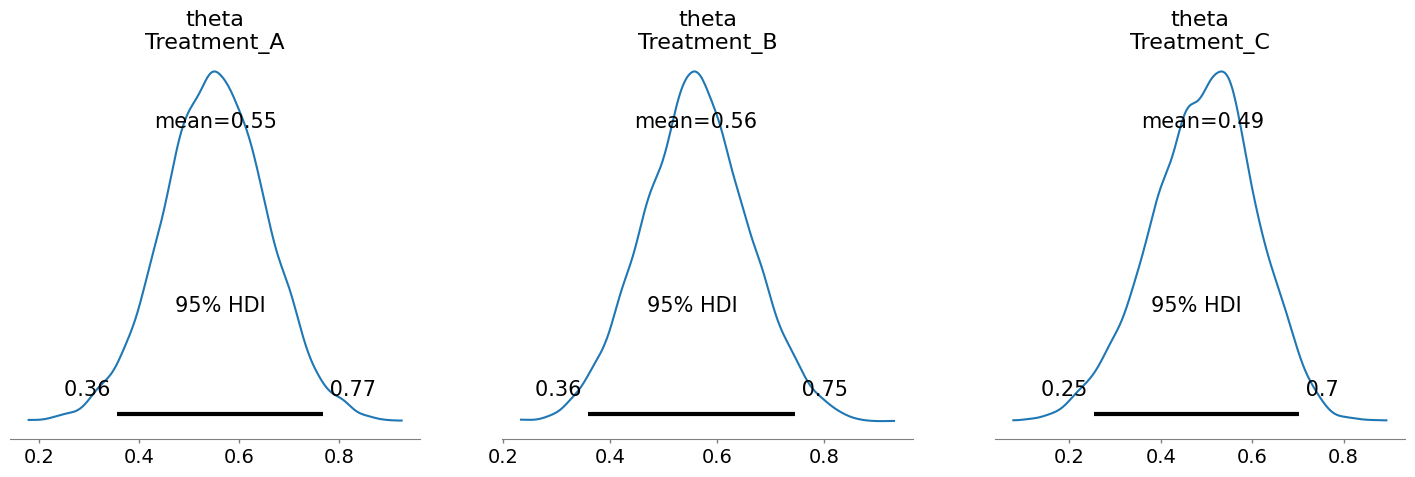

In [35]:
az.plot_posterior(idata, var_names=["theta"], hdi_prob=0.95, figsize=(18, 5));

**HDI** stands for **Highest Density Interval** (also called Highest Posterior Density Interval).

It's a Bayesian credible interval that contains the specified probability mass (e.g., 95%) of the posterior distribution, where every point inside the interval has higher probability density than points outside.

Key properties:

- Contains the most probable values: The 95% HDI contains the 95% most credible parameter values
- Shortest interval: For unimodal distributions, it's the narrowest interval containing that probability mass
- Interpretation: "There's a 95% probability the true parameter lies within this interval"

HDI vs. traditional confidence intervals:
- HDI (Bayesian): "Given the data, there's a 95% probability the parameter is in [a, b]"
- Confidence Interval (Frequentist): "If we repeated this experiment many times, 95% of intervals would contain the true parameter"

# backup

$\Huge P(A \mid B) = \frac{P(B \mid A)\,P(A)}{P(B)}$

$\Huge f_{X \mid Y}(x \mid y) = \frac{f_{Y \mid X}(y \mid x)\,f_X(x)}{f_Y(y)}$


$\Huge f_{X \mid Y}(x \mid y) = \frac{f_{Y \mid X}(y \mid x)\,f_X(x)}{\displaystyle \int_{\mathcal{X}} f_{Y \mid X}(y \mid u)\,f_X(u)\,\mathrm{d}u}$
